# Exploring the FEC 2016 Elections Data

## Dikonimaki Chrysoula p3170039

In [1]:
import pandas as pd
import numpy as np

from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import matplotlib

from collections import defaultdict

from pprint import pprint

import datetime

import itertools 

%matplotlib inline

matplotlib.style.use('ggplot')

pd.set_option("display.max_columns", None)

First of all, we will download the data

#### PAC summary 
* We will get information about PAC and Party committees from https://www.fec.gov/files/bulk-downloads/2016/webk16.zip
* There is no header file so we will change some columns' names manually

In [2]:
pacs = pd.read_csv('https://www.fec.gov/files/bulk-downloads/2016/webk16.zip', sep="|", 
                   index_col=False, header=None)
pacs.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,C00000059,HALLMARK CARDS PAC,Q,U,M,123198.92,0.0,123198.92,0.0,0.0,0.0,0.0,88500.00,0.0,0.00,0.0,0.0,0.0,104794.36,139493.28,0.0,0.0,88500.0,0.00,0.0,0.0,12/31/2016
1,C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...,Q,B,M,2114478.16,0.0,2099958.16,0.0,0.0,0.0,0.0,2047839.79,1790.0,12621.71,0.0,0.0,0.0,552464.38,619102.75,0.0,0.0,1853000.0,141616.35,0.0,0.0,12/31/2016
2,C00000489,D R I V E POLITICAL FUND CHAPTER 886,N,U,Q,41455.17,41453.0,0.00,0.0,0.0,0.0,0.0,39672.85,0.0,0.00,0.0,0.0,0.0,192.00,1974.00,0.0,0.0,0.0,0.00,0.0,0.0,12/31/2016
3,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMITTEE,Q,U,Q,19065.00,0.0,19065.00,0.0,0.0,0.0,0.0,17592.50,2592.5,0.00,0.0,0.0,0.0,4681.26,6153.76,0.0,0.0,15000.0,0.00,0.0,0.0,12/31/2016
4,C00000638,INDIANA STATE MEDICAL ASSOCIATION POLITICAL AC...,Q,U,Q,143170.00,0.0,142570.00,0.0,0.0,0.0,0.0,85918.48,13222.5,0.00,0.0,0.0,0.0,35530.91,92782.43,0.0,0.0,3000.0,0.00,0.0,0.0,12/31/2016


In [3]:
pacs.rename(columns={0: "CMTE_ID", 1:"CMTE_NM", 5:"TTL_RECEIPTS"}, inplace=True)
pacs.columns.tolist()

['CMTE_ID',
 'CMTE_NM',
 2,
 3,
 4,
 'TTL_RECEIPTS',
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26]

#### Contributions from committees to candidates file description
* We will read contributions from committees to candidates from https://www.fec.gov/files/bulk-downloads/2016/pas216.zip
* We'll also need to read the header file separately, available from https://www.fec.gov/files/bulk-downloads/data_dictionaries/pas2_header_file.cs

In [4]:
pas_headers_df = pd.read_csv(
    'https://www.fec.gov/files/bulk-downloads/data_dictionaries/pas2_header_file.csv')

pas_headers = pas_headers_df.columns.tolist()
pas_headers

['CMTE_ID',
 'AMNDT_IND',
 'RPT_TP',
 'TRANSACTION_PGI',
 'IMAGE_NUM',
 'TRANSACTION_TP',
 'ENTITY_TP',
 'NAME',
 'CITY',
 'STATE',
 'ZIP_CODE',
 'EMPLOYER',
 'OCCUPATION',
 'TRANSACTION_DT',
 'TRANSACTION_AMT',
 'OTHER_ID',
 'CAND_ID',
 'TRAN_ID',
 'FILE_NUM',
 'MEMO_CD',
 'MEMO_TEXT',
 'SUB_ID']

In [5]:
data_types = { header: np.str for header in pas_headers }
data_types['TRANSACTION_AMT'] = np.float
data_types

{'CMTE_ID': str,
 'AMNDT_IND': str,
 'RPT_TP': str,
 'TRANSACTION_PGI': str,
 'IMAGE_NUM': str,
 'TRANSACTION_TP': str,
 'ENTITY_TP': str,
 'NAME': str,
 'CITY': str,
 'STATE': str,
 'ZIP_CODE': str,
 'EMPLOYER': str,
 'OCCUPATION': str,
 'TRANSACTION_DT': str,
 'TRANSACTION_AMT': float,
 'OTHER_ID': str,
 'CAND_ID': str,
 'TRAN_ID': str,
 'FILE_NUM': str,
 'MEMO_CD': str,
 'MEMO_TEXT': str,
 'SUB_ID': str}

* Having the headers, we read the actual data.

In [6]:
pas = pd.read_csv('https://www.fec.gov/files/bulk-downloads/2016/pas216.zip', 
                  sep="|", 
                  index_col=False, 
                  names=pas_headers, 
                  dtype=data_types,
                  encoding='ISO-8859-1')
pas.head(5)

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,CAND_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00548198,N,M3,G2016,15950887602,24K,CCM,BLAINE FOR CONGRESS,JEFFERSON CITY,MO,65102,NaN,NaN,02102015,2500.0,C00458679,H8MO09153,6783511,998835,NaN,NaN,4032020151240895091
1,C00548198,N,M3,G2016,15950887602,24K,CCM,KEVIN MCCARTHY FOR CONGRESS,BAKERSFIELD,CA,93389,NaN,NaN,02112015,1000.0,C00420935,H6CA22125,6788487,998835,NaN,NaN,4032020151240895092
2,C00235739,N,M3,P2014,15950887798,24K,CCM,DAN NEWHOUSE FOR CONGRESS,YAKIMA,WA,98909,NaN,NaN,02052015,2500.0,C00559393,H4WA04104,B544444,998836,NaN,NaN,4032020151240895118
3,C00235739,N,M3,P2016,15950887799,24K,CCM,CATHY MCMORRIS RODGERS FOR CONGRESS,SPOKANE,WA,99210,NaN,NaN,02182015,1000.0,C00390476,H4WA05077,B544838,998836,NaN,NaN,4032020151240895120
4,C00235739,N,M3,G2018,15950887799,24K,CCM,MANCHIN FOR WEST VIRGINIA,WASHINGTON,DC,20002,NaN,NaN,02052015,1000.0,C00486563,S0WV00090,B544441,998836,NaN,NaN,4032020151240895121


#### Committee master
* We will read basic information for each committee from https://www.fec.gov/files/bulk-downloads/2016/cm16.zi
* We'll also need to read the header file separately, available from https://www.fec.gov/files/bulk-downloads/data_dictionaries/cm_header_file.csv

In [7]:
cm_headers_df = pd.read_csv(
    'https://www.fec.gov/files/bulk-downloads/data_dictionaries/cm_header_file.csv')

cm_headers = cm_headers_df.columns.tolist()
cm_headers

['CMTE_ID',
 'CMTE_NM',
 'TRES_NM',
 'CMTE_ST1',
 'CMTE_ST2',
 'CMTE_CITY',
 'CMTE_ST',
 'CMTE_ZIP',
 'CMTE_DSGN',
 'CMTE_TP',
 'CMTE_PTY_AFFILIATION',
 'CMTE_FILING_FREQ',
 'ORG_TP',
 'CONNECTED_ORG_NM',
 'CAND_ID']

In [8]:
cm = pd.read_csv('https://www.fec.gov/files/bulk-downloads/2016/cm16.zip', 
                  sep="|", 
                  index_col=False, 
                  names=cm_headers)
cm.head(5)

,CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID
0,C00000059,HALLMARK CARDS PAC,ERIN BROWER,2501 MCGEE,MD#288,KANSAS CITY,MO,64108,U,Q,UNK,M,C,NaN,NaN
1,C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...,"WALKER, KEVIN","25 MASSACHUSETTS AVE, NW",SUITE 600,WASHINGTON,DC,20001,B,Q,NaN,M,M,AMERICAN MEDICAL ASSOCIATION,NaN
2,C00000489,D R I V E POLITICAL FUND CHAPTER 886,TOM RITTER,3528 W RENO,NaN,OKLAHOMA CITY,OK,73107,U,N,NaN,Q,L,TEAMSTERS LOCAL UNION 886,NaN
3,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMITTEE,"C. RICHARD BONEBRAKE, M.D.",623 SW 10TH AVE,NaN,TOPEKA,KS,66612,U,Q,UNK,Q,T,NaN,NaN
4,C00000638,INDIANA STATE MEDICAL ASSOCIATION POLITICAL AC...,"VIDYA KORA, M.D.","322 CANAL WALK, CANAL LEVEL",NaN,INDIANAPOLIS,IN,46202,U,Q,NaN,Q,M,NaN,NaN


* We will focus on PACs and super-PACs with the aim of answering the first question
* PACs and super-PACs are subset of all PACs that PAC summary contains so we need to exclude other PAC categories
* Committee type code informs us for the type of the PAC (https://www.fec.gov/campaign-finance-data/committee-type-code-descriptions/)
* CMTE_TP=O : Independent expenditure-only (Super PACs)
* CMTE_TP=Q : PAC - qualified
* CMTE_TP=N : PAC - nonqualified

In [9]:
print(len(set(cm[(cm.CMTE_TP=='Q')|(cm.CMTE_TP=='O')|(cm.CMTE_TP=='N')].CMTE_ID.tolist()).intersection(pacs.CMTE_ID)))
print(len(set(cm[(cm.CMTE_TP=='Q')|(cm.CMTE_TP=='O')|(cm.CMTE_TP=='N')].CMTE_ID.tolist())))
print(len(pacs.CMTE_ID))

9016
9016
12048


In [10]:
cm['isPAC'] = np.where(cm.CMTE_TP.isin(['Q','O','N']),True,False)

#### Candidate master
* We will read basic information for each candidate from https://www.fec.gov/files/bulk-downloads/2016/pas216.zip
* We'll also need to read the header file separately, available from https://www.fec.gov/data/browse-data/files/bulk-downloads/data_dictionaries/cn_header_file.csv

In [11]:
cn_headers_df = pd.read_csv(
    'https://www.fec.gov/data/browse-data/files/bulk-downloads/data_dictionaries/cn_header_file.csv')

cn_headers = cn_headers_df.columns.tolist()
cn_headers

['CAND_ID',
 'CAND_NAME',
 'CAND_PTY_AFFILIATION',
 'CAND_ELECTION_YR',
 'CAND_OFFICE_ST',
 'CAND_OFFICE',
 'CAND_OFFICE_DISTRICT',
 'CAND_ICI',
 'CAND_STATUS',
 'CAND_PCC',
 'CAND_ST1',
 'CAND_ST2',
 'CAND_CITY',
 'CAND_ST',
 'CAND_ZIP']

In [12]:
cn = pd.read_csv('https://www.fec.gov/files/bulk-downloads/2016/cn16.zip', 
                  sep="|", 
                  index_col=False, 
                  names=cn_headers)
cn.head(5)

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
0,H0AK00097,"COX, JOHN R.",REP,2014,AK,H,0.0,C,N,C00525261,P.O. BOX 1092,NaN,ANCHOR POINT,AK,99556.0
1,H0AL02087,"ROBY, MARTHA",REP,2016,AL,H,2.0,I,C,C00462143,PO BOX 195,NaN,MONTGOMERY,AL,36101.0
2,H0AL02095,"JOHN, ROBERT E JR",IND,2016,AL,H,2.0,C,N,NaN,1465 W OVERBROOK RD,NaN,MILLBROOK,AL,36054.0
3,H0AL05049,"CRAMER, ROBERT E ""BUD"" JR",DEM,2008,AL,H,5.0,NaN,P,C00239038,PO BOX 2621,NaN,HUNTSVILLE,AL,35804.0
4,H0AL05163,"BROOKS, MO",REP,2016,AL,H,5.0,I,C,C00464149,7610 FOXFIRE DRIVE,NaN,HUNTSVILLE,AL,35802.0


In [13]:
len(cn.CAND_NAME.unique())

7237

* We had to search for the two candidates using their names, seeing that there is a a large number of candidates.

In [14]:
cn.loc[cn.CAND_NAME.str.contains('TRUMP', regex=False)]

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
5868,P60018835,"TRUMP, THE MUSLIM DICTATOR",REP,2016,US,P,0.0,O,N,NaN,725 5TH AVE,NaN,NEW YORK,NY,10022.0
5883,P60018991,"TRUMP, DON'T VOTE FOR",COM,2016,US,P,0.0,O,N,NaN,1090 MAIN ST.,NaN,NORWALK,IA,50211.0
6298,P80001571,"TRUMP, DONALD J. / MICHAEL R. PENCE",REP,2016,US,P,0.0,O,C,C00580100,725 FIFTH AVENUE,NaN,NEW YORK,NY,10022.0


In [15]:
cn.loc[cn.CAND_NAME.str.contains('CLINTON', regex=False)]

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
999,H2MI08105,"HETRICK, BRIAN CLINTON",REP,2012,MI,H,8.0,C,N,C00507475,3603 TRAILS END CT,NaN,BRIGHTON,MI,481148174.0
4367,P00003392,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN
5307,P60012333,"CLINTON, BILL",DFL,2016,US,P,0.0,O,N,NaN,712 VICTORY DRIVE,NaN,TEXARKANA,TX,75501.0
6540,S0NY00188,"CLINTON, HILLARY RODHAM",DEM,2012,NY,S,0.0,C,P,C00358895,420 LEXINGTON AVENUE SUITE 350,NaN,NEW YORK,NY,10170.0


* We observe that there is 2 entries for Hillary Clinton.
* We want Hillary's entry with election year 2016. 

In [16]:
pas.TRANSACTION_DT = pd.to_datetime(pas.TRANSACTION_DT, format='%d%m%Y',errors='coerce')
pas.dtypes

tmp = pas.loc[pas.CAND_ID=='S0NY00188']
tmp.TRANSACTION_DT

print('Number of transactions before 2015:')
print(len(tmp[tmp.TRANSACTION_DT.apply(lambda x: x.year)<2015].TRANSACTION_DT.tolist()))
print('Number of transactions after 2015:')
print(len(tmp[tmp.TRANSACTION_DT.apply(lambda x: x.year)>=2015].TRANSACTION_DT.tolist()))

Number of transactions before 2015:
0
Number of transactions after 2015:
18


* However, we observe that all transactions with Hillary's 2012 id occured in 2016
* Thus, we will keep those entries and they will be attributed to wrong given id
* Consequently, we will focus on candidates' names

In [17]:
cn.loc[cn['CAND_NAME'] == 'TRUMP, DONALD J. / MICHAEL R. PENCE ', 'CAND_NAME'] = 'TRUMP, DONALD J.'
cn.loc[cn['CAND_NAME'] == 'CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE', 'CAND_NAME'] = 'CLINTON, HILLARY RODHAM'

* We will continue with both entries for Hillary

In [18]:
cn.loc[cn.CAND_NAME == 'CLINTON, HILLARY RODHAM']

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
4367,P00003392,"CLINTON, HILLARY RODHAM",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN
6540,S0NY00188,"CLINTON, HILLARY RODHAM",DEM,2012,NY,S,0.0,C,P,C00358895,420 LEXINGTON AVENUE SUITE 350,NaN,NEW YORK,NY,10170.0


* We will focus on the two presidential candidates

In [19]:
cn_2 = cn.loc[(cn.CAND_NAME =='TRUMP, DONALD J.') | (cn.CAND_NAME =='CLINTON, HILLARY RODHAM')].copy()
cn_2

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
4367,P00003392,"CLINTON, HILLARY RODHAM",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN
6298,P80001571,"TRUMP, DONALD J.",REP,2016,US,P,0.0,O,C,C00580100,725 FIFTH AVENUE,NaN,NEW YORK,NY,10022.0
6540,S0NY00188,"CLINTON, HILLARY RODHAM",DEM,2012,NY,S,0.0,C,P,C00358895,420 LEXINGTON AVENUE SUITE 350,NaN,NEW YORK,NY,10170.0


* We observe that in 'Contributions from committees to candidates file description' there is 'TRANSACTION_TP' which specifies the type of transaction
* It is an extremely useful parameter because PACS donate funds to campaigns for or against candidates (https://en.wikipedia.org/wiki/Political_action_committee)
* TRANSACTION_TP=24A: Independent expenditure opposing election of candidate
* TRANSACTION_TP=24E: Independent expenditure advocating election of candidate

* Now we will go into details

* We will merge in order to produce the necessary information

In [20]:
pas_cn = pd.merge(pas[['CAND_ID','CMTE_ID','TRANSACTION_AMT','TRANSACTION_TP']], 
               cn[['CAND_ID','CAND_NAME']], 
               on='CAND_ID', 
               how='inner')

contr_to_cans = pd.merge(pas_cn, 
               cm[['CMTE_ID','CMTE_NM','CMTE_TP','isPAC']], 
               on='CMTE_ID', 
               how='inner')

In [21]:
# some initializations
e = '24E'
a = '24A'

In [22]:
# dataframe creation
tmp = contr_to_cans.groupby(['CMTE_ID', 'TRANSACTION_TP','CAND_ID','isPAC']).size().to_frame('size').reset_index()
tmp['size'] = tmp['size'].apply(pd.to_numeric) 

In [23]:
# some initializations
hillary = ((tmp.CAND_ID=='P00003392') |(tmp.CAND_ID=='S0NY00188'))
trump = (tmp.CAND_ID=='P80001571')

In [24]:
# hillary's data
e_hillary = tmp.loc[tmp.isPAC & (tmp.TRANSACTION_TP==e) & hillary]
a_hillary = tmp.loc[tmp.isPAC & (tmp.TRANSACTION_TP==a) & hillary]

In [25]:
# trumps's data
e_trump = tmp.loc[tmp.isPAC & (tmp.TRANSACTION_TP==e) & trump]
a_trump = tmp.loc[tmp.isPAC & (tmp.TRANSACTION_TP==a) & trump]

* There are some committees that donated money both to campaigns for and against Hillary/Trump

In [26]:
len(list(set(e_hillary.CMTE_ID.tolist()) & set(a_hillary.CMTE_ID.tolist())))

18

In [27]:
len(list(set(e_trump.CMTE_ID.tolist()) & set(a_hillary.CMTE_ID.tolist())))

25

* Also, there are some committees that donated money for both Hillary and Trump and against both of them

In [28]:
len(list(set(e_hillary.CMTE_ID.tolist()) & set(e_trump.CMTE_ID.tolist())))

11

In [29]:
len(list(set(a_hillary.CMTE_ID.tolist()) & set(a_hillary.CMTE_ID.tolist())))

64

* Moreover, there are some committees that donated money for other candidates and against Hillary/Trump

In [30]:
no_hillary_and_no_trump = (~(hillary) & (~trump))
hillary_or_trump = (hillary | trump)

other_cands_e = tmp[tmp.isPAC & (no_hillary_and_no_trump) & (tmp.TRANSACTION_TP==e)].CMTE_ID.tolist()
two_cands_a = tmp[tmp.isPAC & (hillary_or_trump) & (tmp.TRANSACTION_TP==a)].CMTE_ID.tolist()

len(list(set(other_cands_e) & set(two_cands_a)))

67

1. Identify the top 5 Political Action Committees (PACs), or rather, super-PACs, that supported each of the two presidential candidates, giving the amount of money raised and spent by each one of them. 

* We will focus on the two presidential candidates so we will define the PACs which are for Hillary as the ones which spent money for her and spent money against Trump or as the ones which spent money for her and vice versa. 
*PACs which donated money for Hillary/Trump and agaist Hillary/Trump will be considered as for Hillary/Trump if they spent more money for her/him than agaist her/him.
* PACs which spent money both for Hillary and Trump will be considered against the candidate which they spent the less amount of money for. 
* PACs which donated money against Trump but did't donate money on Hillary will be excluded from Hillary's PACs and vice versa.

* We will check the PACs that spent money for and against the same candidate and we will focus on the biggest amount.
* For example, if a PAC spent 1K dollars for Hillton and only 500 dollars against her, we will consider this PAC as for her.

* We will merge in order to focus on the two candidates

In [31]:
contr_to_2cans = pd.merge(contr_to_cans, 
               cn_2[['CAND_ID']], 
               on='CAND_ID', 
               how='inner')

In [32]:
e_hillary_sum = contr_to_2cans[(contr_to_2cans.CAND_NAME=='CLINTON, HILLARY RODHAM')\
                        & (contr_to_2cans.TRANSACTION_TP==e)].groupby(['CMTE_ID','isPAC']).sum().reset_index()
a_hillary_sum = contr_to_2cans[(contr_to_2cans.CAND_NAME=='CLINTON, HILLARY RODHAM')\
                        & (contr_to_2cans.TRANSACTION_TP==a) ].groupby(['CMTE_ID','isPAC']).sum().reset_index()
e_trump_sum = contr_to_2cans[(contr_to_2cans.CAND_NAME=='TRUMP, DONALD J.')\
                        & (contr_to_2cans.TRANSACTION_TP==e) ].groupby(['CMTE_ID','isPAC']).sum().reset_index()
a_trump_sum = contr_to_2cans[(contr_to_2cans.CAND_NAME=='TRUMP, DONALD J.')\
                        & (contr_to_2cans.TRANSACTION_TP==a) ].groupby(['CMTE_ID','isPAC']).sum().reset_index()

In [33]:
hillary_sum_e_a = pd.merge(e_hillary_sum, 
               a_hillary_sum, 
               on='CMTE_ID', 
               how='outer',
               suffixes=('_e','_a'))
hillary_sum_e_a.TRANSACTION_AMT_e = hillary_sum_e_a.TRANSACTION_AMT_e.fillna(0)
hillary_sum_e_a.TRANSACTION_AMT_a = hillary_sum_e_a.TRANSACTION_AMT_a.fillna(0)
hillary_sum_e_a

hillary_sum_e_a['forHillary'] = hillary_sum_e_a.apply(lambda x: x['TRANSACTION_AMT_e'] > x['TRANSACTION_AMT_a'], axis=1)

In [34]:
hillary_sum_e_a['isPAC'] = np.where(hillary_sum_e_a.isPAC_e | hillary_sum_e_a.isPAC_a,True,False)
hillary_sum_e_a.drop(['isPAC_e','isPAC_a'], axis = 1, inplace=True) 

* There are some committees that spent more money against her and less money for her.
* Undoubtedly, those committees are against Hillary.

In [35]:
hillary_sum_e_a[~hillary_sum_e_a.forHillary].shape

(84, 5)

In [36]:
hillary_sum_e_a[hillary_sum_e_a.forHillary].shape

(142, 5)

* We will do the same process for Trump

In [37]:
trump_sum_e_a = pd.merge(e_trump_sum, 
               a_trump_sum, 
               on='CMTE_ID', 
               how='outer',
               suffixes=('_e','_a'))
trump_sum_e_a.TRANSACTION_AMT_e = trump_sum_e_a.TRANSACTION_AMT_e.fillna(0)
trump_sum_e_a.TRANSACTION_AMT_a = trump_sum_e_a.TRANSACTION_AMT_a.fillna(0)
trump_sum_e_a

trump_sum_e_a['forTrump'] = trump_sum_e_a.apply(lambda x: x['TRANSACTION_AMT_e'] > x['TRANSACTION_AMT_a'], axis=1)

In [38]:
trump_sum_e_a['isPAC'] = np.where(trump_sum_e_a.isPAC_e | trump_sum_e_a.isPAC_a,True,False)
trump_sum_e_a.drop(['isPAC_e','isPAC_a'], axis = 1, inplace=True) 

In [39]:
trump_sum_e_a[~trump_sum_e_a.forTrump].shape

(148, 5)

In [40]:
trump_sum_e_a[trump_sum_e_a.forTrump].shape

(76, 5)

* We will check for abnormal situations

In [41]:
hillary_trump_e_a = pd.merge(hillary_sum_e_a, 
               trump_sum_e_a, 
               on='CMTE_ID', 
               how='inner',
               suffixes=('_h','_t'))
hillary_trump_e_a[['TRANSACTION_AMT_e_h','TRANSACTION_AMT_a_h','TRANSACTION_AMT_e_t','TRANSACTION_AMT_a_t']]\
        =hillary_trump_e_a[['TRANSACTION_AMT_e_h','TRANSACTION_AMT_a_h','TRANSACTION_AMT_e_t','TRANSACTION_AMT_a_t']].fillna(0)

In [42]:
hillary_sum_e_a

,CMTE_ID,TRANSACTION_AMT_e,TRANSACTION_AMT_a,forHillary,isPAC
0,C00002089,150.0,0.0,True,True
1,C00002766,133175.0,0.0,True,True
2,C00003590,14939.0,0.0,True,True
3,C00003632,59417.0,0.0,True,True
4,C00004036,3126926.0,10.0,True,True
...,...,...,...,...,...
221,C90013301,0.0,12307924.0,False,False
222,C90014085,0.0,51500.0,False,False
223,C90014788,0.0,1000.0,False,False
224,C90015447,0.0,9178.0,False,False


* There are 2 committees for Hillary and for Trump
* We observe that they didn't spend a great amount of money for none of the 2 candidates
* Thus, we will consider them both against Hillary and Trump

In [43]:
hillary_trump_e_a[hillary_trump_e_a.forHillary & hillary_trump_e_a.forTrump][['CMTE_ID','TRANSACTION_AMT_e_h','TRANSACTION_AMT_a_h','TRANSACTION_AMT_e_t','TRANSACTION_AMT_a_t']]

,CMTE_ID,TRANSACTION_AMT_e_h,TRANSACTION_AMT_a_h,TRANSACTION_AMT_e_t,TRANSACTION_AMT_a_t
55,C90011438,185.0,0.0,2000.0,1681.0
61,C90015678,12425.0,0.0,8362.0,0.0


In [44]:
CMTE_IDs = ['C90011438','C90015678']
hillary_trump_e_a['forHillary'] = np.where(hillary_trump_e_a.CMTE_ID.isin(CMTE_IDs),False,hillary_trump_e_a.forHillary)
hillary_trump_e_a['forTrump'] = np.where(hillary_trump_e_a.CMTE_ID.isin(CMTE_IDs),False,hillary_trump_e_a.forTrump)

* There are some PACs that are against the two candidates
* They may support a different candidate or a different party
* We should not include those transactions

In [45]:
hillary_trump_e_a[~(hillary_trump_e_a.forHillary) & ~(hillary_trump_e_a.forTrump)]

,CMTE_ID,TRANSACTION_AMT_e_h,TRANSACTION_AMT_a_h,forHillary,isPAC_h,TRANSACTION_AMT_e_t,TRANSACTION_AMT_a_t,forTrump,isPAC_t
43,C00626119,0.0,0.0,False,True,15000.0,138999.0,False,True
55,C90011438,185.0,0.0,False,False,2000.0,1681.0,False,False
61,C90015678,12425.0,0.0,False,False,8362.0,0.0,False,False
80,C00487470,0.0,512.0,False,False,29.0,7054203.0,False,True
84,C00569517,0.0,14409.0,False,False,0.0,12000.0,False,False
89,C00575373,0.0,4376616.0,False,False,0.0,93090.0,False,False
90,C00587022,0.0,100.0,False,False,0.0,59007.0,False,False
98,C90011800,0.0,509080.0,False,False,0.0,2500.0,False,False


* Now we will check for abnormal situations where a PAC is for Hillary and against Trump but the amount of money it spent for Hillary is less than the amount of money that spent for Trump and vice versa.
* We observe that there is a committee that spent a greater amount of money for Hillary than for Trump. However, the amount of money it spent against her is greater so we will continue

In [46]:
hillary_trump_e_a[(hillary_trump_e_a.forHillary) & ~(hillary_trump_e_a.forTrump) 
                  & (hillary_trump_e_a.TRANSACTION_AMT_e_h<hillary_trump_e_a.TRANSACTION_AMT_e_t)]

,CMTE_ID,TRANSACTION_AMT_e_h,TRANSACTION_AMT_a_h,forHillary,isPAC_h,TRANSACTION_AMT_e_t,TRANSACTION_AMT_a_t,forTrump,isPAC_t


In [47]:
hillary_trump_e_a[(hillary_trump_e_a.forTrump) & ~(hillary_trump_e_a.forHillary) 
                  & (hillary_trump_e_a.TRANSACTION_AMT_e_h>hillary_trump_e_a.TRANSACTION_AMT_e_t)]

,CMTE_ID,TRANSACTION_AMT_e_h,TRANSACTION_AMT_a_h,forHillary,isPAC_h,TRANSACTION_AMT_e_t,TRANSACTION_AMT_a_t,forTrump,isPAC_t
24,C00544767,30884.0,3630607.0,False,False,16650.0,0.0,True,False


* We are ready to find the top 5 PACs which spent the greater amount of money for each of the two candidates

In [48]:
hillary_trump = pd.merge(hillary_sum_e_a, 
               trump_sum_e_a, 
               on='CMTE_ID', 
               how='outer',
               suffixes=('_h','_t')).reset_index()
hillary_trump.forHillary.fillna(False, inplace=True)
hillary_trump.forTrump.fillna(False, inplace=True)
hillary_trump.isPAC_h.fillna(False, inplace=True)
hillary_trump.isPAC_t.fillna(False, inplace=True)
hillary_trump.fillna(0, inplace=True)
hillary_trump

,index,CMTE_ID,TRANSACTION_AMT_e_h,TRANSACTION_AMT_a_h,forHillary,isPAC_h,TRANSACTION_AMT_e_t,TRANSACTION_AMT_a_t,forTrump,isPAC_t
0,0,C00002089,150.0,0.0,True,True,0.0,0.0,False,False
1,1,C00002766,133175.0,0.0,True,True,0.0,0.0,False,False
2,2,C00003590,14939.0,0.0,True,True,0.0,0.0,False,False
3,3,C00003632,59417.0,0.0,True,True,0.0,0.0,False,False
4,4,C00004036,3126926.0,10.0,True,True,4580.0,1197388.0,False,True
...,...,...,...,...,...,...,...,...,...,...
345,345,C90016833,0.0,0.0,False,False,0.0,10802.0,False,False
346,346,C90016940,0.0,0.0,False,False,0.0,8145.0,False,False
347,347,C90016973,0.0,0.0,False,False,0.0,20609.0,False,False
348,348,C90017021,0.0,0.0,False,False,0.0,700000.0,False,False


In [49]:
hillary_trump['isPAC'] = np.where(hillary_trump.isPAC_h | hillary_trump.isPAC_t,True,False)
hillary_trump.drop(['isPAC_h','isPAC_h'], axis = 1, inplace=True) 

In [50]:
hillary_trump = pd.merge(hillary_trump, 
               pacs[['CMTE_ID','CMTE_NM', 'TTL_RECEIPTS']], 
               on='CMTE_ID', 
               how='inner')

In [51]:
hillary_trump['fundsForH'] = hillary_trump[hillary_trump.isPAC & hillary_trump.forHillary & ~hillary_trump.forTrump]\
.apply(lambda x: x['TRANSACTION_AMT_e_h'] + x['TRANSACTION_AMT_a_t'], axis=1)

hillary_trump.sort_values(by='fundsForH', ascending=False).head(5)[['CMTE_NM','fundsForH']]\
.rename(columns={'CMTE_NM':'Hillary\'s top 5 PACs','fundsForH':'spent funds'}).reset_index(drop = True) 

,Hillary's top 5 PACs,spent funds
0,PRIORITIES USA ACTION,132535920.0
1,UNITED WE CAN,13499952.0
2,WOMEN VOTE!,11627748.0
3,LCV VICTORY FUND,8432699.0
4,FOR OUR FUTURE,7540260.0


In [52]:
hillary_trump['fundsForT'] = hillary_trump[hillary_trump.isPAC & hillary_trump.forTrump & ~hillary_trump.forHillary]\
.apply(lambda x: x['TRANSACTION_AMT_e_t'] + x['TRANSACTION_AMT_a_h'], axis=1)

hillary_trump.sort_values(by='fundsForT', ascending=False).head(5)[['CMTE_NM','fundsForT']]\
.rename(columns={'CMTE_NM':'Trump\'s top 5 PACs','fundsForT':'spent funds'}).reset_index(drop = True) 

,Trump's top 5 PACs,spent funds
0,FUTURE45,24219101.0
1,REBUILDING AMERICA NOW,21197098.0
2,NATIONAL RIFLE ASSOCIATION OF AMERICA POLITICA...,9315549.0
3,SAVE AMERICA FROM ITS GOVERNMENT,3415286.0
4,CITIZENS UNITED SUPER PAC LLC,1500853.0


* We are ready to find the top 5 PACs which raised the greater amount of money for each of the two candidates


In [53]:
hillary_trump[hillary_trump.isPAC & hillary_trump.forHillary & ~hillary_trump.forTrump]\
.sort_values(by='TTL_RECEIPTS', ascending=False)\
.head(5)[['CMTE_NM','TTL_RECEIPTS']]\
.rename(columns={'CMTE_NM':'Hillary\'s top 5 PACs','TTL_RECEIPTS':'raised funds'}).reset_index(drop = True) 

,Hillary's top 5 PACs,raised funds
0,PRIORITIES USA ACTION,1.920658e+08
1,NEXTGEN CLIMATE ACTION COMMITTEE,9.301024e+07
2,SENATE MAJORITY PAC,9.282108e+07
3,SEIU COPE (SERVICE EMPLOYEES INTERNATIONAL UNI...,5.026468e+07
4,FOR OUR FUTURE,4.894757e+07


In [54]:
hillary_trump[hillary_trump.isPAC & hillary_trump.forTrump & ~hillary_trump.forHillary]\
.sort_values(by='TTL_RECEIPTS', ascending=False)\
.head(5)[['CMTE_NM','TTL_RECEIPTS']]\
.rename(columns={'CMTE_NM':'Trump\'s top 5 PACs','TTL_RECEIPTS':'raised funds'}).reset_index(drop = True) 

,Trump's top 5 PACs,raised funds
0,FUTURE45,24996520.04
1,REBUILDING AMERICA NOW,23616516.94
2,NATIONAL RIFLE ASSOCIATION OF AMERICA POLITICA...,21591111.40
3,THE 2016 COMMITTEE,15020143.14
4,TEA PARTY PATRIOTS CITIZENS FUND,4330867.79


2. Identify the top 10 individual donors (i.e., persons) for each of the two presidential candidates and the amount they spent. In order to do that, you should know that donations are not always to a fundraising committee that can be directly linked to a candidate, but they can be due to other entities such as PACs.


#### Contributions by individuals 
* We will get information about Contributions by individuals from https://www.fec.gov/files/bulk-downloads/2016/indiv16.zip
* We'll also need to read the header file separately, available from  https://www.fec.gov/files/bulk-downloads/data_dictionaries/indiv_header_file.csv

In [55]:
indiv_df = pd.read_csv(
    'https://www.fec.gov/files/bulk-downloads/data_dictionaries/indiv_header_file.csv')

indiv_header = indiv_df.columns.tolist()
indiv_header

['CMTE_ID',
 'AMNDT_IND',
 'RPT_TP',
 'TRANSACTION_PGI',
 'IMAGE_NUM',
 'TRANSACTION_TP',
 'ENTITY_TP',
 'NAME',
 'CITY',
 'STATE',
 'ZIP_CODE',
 'EMPLOYER',
 'OCCUPATION',
 'TRANSACTION_DT',
 'TRANSACTION_AMT',
 'OTHER_ID',
 'TRAN_ID',
 'FILE_NUM',
 'MEMO_CD',
 'MEMO_TEXT',
 'SUB_ID']

In [56]:
data_types = { header: np.str for header in indiv_header }
data_types['TRANSACTION_AMT'] = np.float
data_types

{'CMTE_ID': str,
 'AMNDT_IND': str,
 'RPT_TP': str,
 'TRANSACTION_PGI': str,
 'IMAGE_NUM': str,
 'TRANSACTION_TP': str,
 'ENTITY_TP': str,
 'NAME': str,
 'CITY': str,
 'STATE': str,
 'ZIP_CODE': str,
 'EMPLOYER': str,
 'OCCUPATION': str,
 'TRANSACTION_DT': str,
 'TRANSACTION_AMT': float,
 'OTHER_ID': str,
 'TRAN_ID': str,
 'FILE_NUM': str,
 'MEMO_CD': str,
 'MEMO_TEXT': str,
 'SUB_ID': str}

In [57]:
indiv = pd.read_csv('indiv16/itcont.txt', 
                  sep="|", 
                  index_col=False, 
                  names=indiv_header, 
                  dtype=data_types,
                  usecols=['CMTE_ID','TRANSACTION_TP','NAME','TRANSACTION_DT','TRANSACTION_AMT','ENTITY_TP'],
                  encoding='ISO-8859-1')
indiv.head(5)

,CMTE_ID,TRANSACTION_TP,ENTITY_TP,NAME,TRANSACTION_DT,TRANSACTION_AMT
0,C00088591,15,IND,"BURCH, MARY K.",02132015,500.0
1,C00088591,15,IND,"KOUNTZ, DONALD E.",02132015,200.0
2,C00088591,15,IND,"KOUNTZ, DONALD E.",02272015,200.0
3,C00088591,15,IND,"DOSHI, NIMISH M.",02132015,200.0
4,C00088591,15,IND,"DOSHI, NIMISH M.",02272015,200.0


In [58]:
indiv.TRANSACTION_DT = pd.to_datetime(indiv.TRANSACTION_DT, format='%d%m%Y',errors='coerce')

In [59]:
indiv_hillary_trump = pd.merge(hillary_trump[['CMTE_ID','CMTE_NM','forHillary','forTrump','isPAC']], 
               indiv, 
               on='CMTE_ID', 
               how='inner').reset_index()

* Hillary's top 10 individual donors:

In [60]:
indiv_hillary_trump[(indiv_hillary_trump.ENTITY_TP=='IND') & indiv_hillary_trump.isPAC & indiv_hillary_trump.forHillary & ~indiv_hillary_trump.forTrump]\
.groupby('NAME').sum()\
.sort_values(by='TRANSACTION_AMT', ascending=False).head(10)[['TRANSACTION_AMT']]

,TRANSACTION_AMT
NAME,
"STEYER, THOMAS F.",89500000.0
"SUSSMAN, DONALD",24000000.0
"EYCHANER, FRED",23000000.0
"SOROS, GEORGE",15506693.0
"MOSKOVITZ, DUSTIN",13500000.0
"ASSOCIATION, NATIONAL EDUCATION",12175000.0
"SIMONS, JAMES",11000680.0
"PRITZKER, JAY ROBERT",9300848.0
"ABRAHAM, DANIEL",9250000.0


* Trump's top 10 individual donors:

In [61]:
indiv_hillary_trump[indiv_hillary_trump.isPAC & indiv_hillary_trump.forTrump & ~indiv_hillary_trump.forHillary]\
.groupby('NAME').sum()\
.sort_values(by='TRANSACTION_AMT', ascending=False).head(10)[['TRANSACTION_AMT']]

,TRANSACTION_AMT
NAME,
"ADELSON, MIRIAM",10000000.0
"ADELSON, SHELDON",10000000.0
"MCMAHON, LINDA E.",7000000.0
"MARCUS, BERNARD",5000000.0
"PALMER, GEOFFREY H.",4000000.0
"BEAL, DANIEL A.",3615764.0
"CAMERON, RONALD M.",2005000.0
"PALMER, GEOFFREY H",2000000.0
"UIHLEIN, RICHARD E.",1490000.0


3. Investigate the chronological evolution of the contributions made to and the expenditures made by the campaigns.

In [62]:
# useful functions
def thousands(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fk' % (x * 1e-3)

def plot(x_pos, labels, colors,leg_labels,title,fig=(15, 10),width=0.4):
    formatter = FuncFormatter(thousands)
    
    y_pos = np.arange(24)
    fig, ax = plt.subplots(figsize=fig)

    ax.xaxis.set_major_formatter(formatter)
    plt.title(title)

    if(len(x_pos)==1):
        ax.barh(y_pos, x_pos[0], align='center',label=leg_labels[0],color=colors[0])
        ax.set_yticks(y_pos)
    elif (len(x_pos)==2):
        ax.barh(y_pos, x_pos[0],width, color=colors[0], label=leg_labels[0])
        ax.barh(y_pos + width, x_pos[1],width, color=colors[1], label=leg_labels[1])
        ax.set_yticks(y_pos+ width/2)
        
    ax.set_yticklabels(labels)
    plt.legend(loc='best')
    plt.show()

In [63]:
#create labels
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',\
          'August', 'September', 'October', 'November', 'December']
years = ['2015','2016']

labels = list(itertools.product(years,months))
labels = [ "%s %s" % x for x in labels]

In [64]:
bins_dt = pd.date_range(*(pd.to_datetime(['2014-12', '2016-12']) + pd.offsets.MonthEnd()), freq='M')
bins_dt

DatetimeIndex(['2014-12-31', '2015-01-31', '2015-02-28', '2015-03-31',
               '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31',
               '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30',
               '2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31',
               '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31',
               '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30',
               '2016-12-31'],
              dtype='datetime64[ns]', freq='M')

* As we can see there are some outliers (wrong dates)
* We want dates in range [2015, 2016] Thus, we will delete outliers

In [65]:
max_contrib = indiv.loc[indiv['TRANSACTION_DT'].idxmax()]
max_contrib.TRANSACTION_DT

Timestamp('2201-02-06 00:00:00')

In [66]:
min_contrib = indiv.loc[indiv['TRANSACTION_DT'].idxmin()]
min_contrib.TRANSACTION_DT

Timestamp('2000-09-03 00:00:00')

In [67]:
indiv_1516 = indiv[(indiv.TRANSACTION_DT>(pd.to_datetime('2014-12'))+pd.offsets.MonthEnd())\
                   & (indiv.TRANSACTION_DT<=(pd.to_datetime('2016-12'))+pd.offsets.MonthEnd())]

In [68]:
max_contrib = indiv_1516.loc[indiv_1516['TRANSACTION_DT'].idxmax()]
max_contrib.TRANSACTION_DT

Timestamp('2016-12-12 00:00:00')

In [69]:
min_contrib = indiv_1516.loc[indiv_1516['TRANSACTION_DT'].idxmin()]
min_contrib.TRANSACTION_DT

Timestamp('2015-01-01 00:00:00')

* The chronological evolution of the contributions made to the campaigns per month

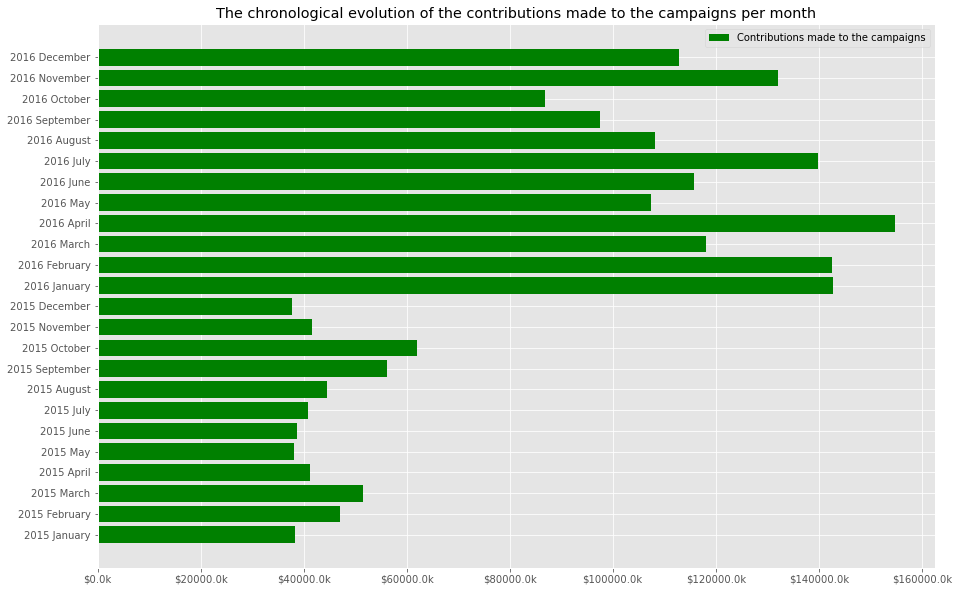

In [70]:
bin_labels_indiv = pd.cut(indiv_1516['TRANSACTION_DT'], bins_dt)
grouped_indiv = indiv_1516.groupby(bin_labels_indiv)
bucket_sums_indiv = grouped_indiv['TRANSACTION_AMT'].sum().reset_index()
plot([bucket_sums_indiv.TRANSACTION_AMT], labels, colors=['green'],\
     leg_labels=['Contributions made to the campaigns'],title='The chronological evolution of the contributions made to the campaigns per month')

* Although, the 2016 United States presidential election held on Tuesday, November 8, 2016 (https://en.wikipedia.org/wiki/2016_United_States_presidential_election), all the imporant contributions had made to the campaings in 2015.
* In other words,all the imporant contributions had made to the campaings almost 1 year before the election

* Now we will do the same process but separately for each one of the two candidates

In [71]:
hillary_to_camp = indiv_hillary_trump[indiv_hillary_trump.forHillary & ~indiv_hillary_trump.forTrump & (indiv_hillary_trump.TRANSACTION_DT>(pd.to_datetime('2014-12'))+pd.offsets.MonthEnd())\
                   & (indiv_hillary_trump.TRANSACTION_DT<=(pd.to_datetime('2016-12'))+pd.offsets.MonthEnd())]
trump_to_camp = indiv_hillary_trump[~indiv_hillary_trump.forHillary & indiv_hillary_trump.forTrump & (indiv_hillary_trump.TRANSACTION_DT>(pd.to_datetime('2014-12'))+pd.offsets.MonthEnd())\
                   & (indiv_hillary_trump.TRANSACTION_DT<=(pd.to_datetime('2016-12'))+pd.offsets.MonthEnd())]

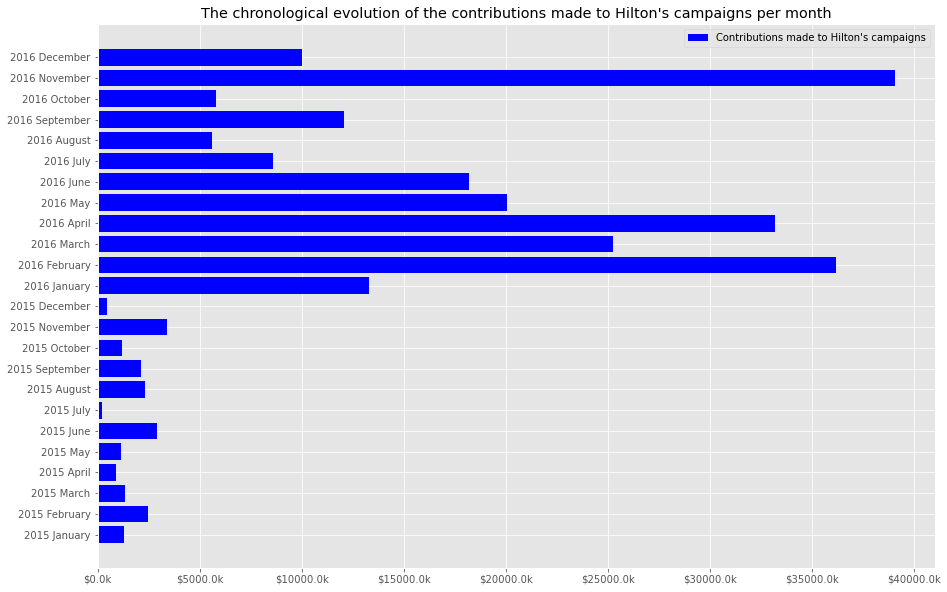

In [72]:
bin_labels_indiv = pd.cut(hillary_to_camp['TRANSACTION_DT'], bins_dt)
grouped_indiv = hillary_to_camp.groupby(bin_labels_indiv)
hillary_bucket_sums_indiv = grouped_indiv['TRANSACTION_AMT'].sum().reset_index()
plot([hillary_bucket_sums_indiv.TRANSACTION_AMT], labels, colors=['blue'],\
     leg_labels=['Contributions made to Hilton\'s campaigns'],title='The chronological evolution of the contributions made to Hilton\'s campaigns per month')

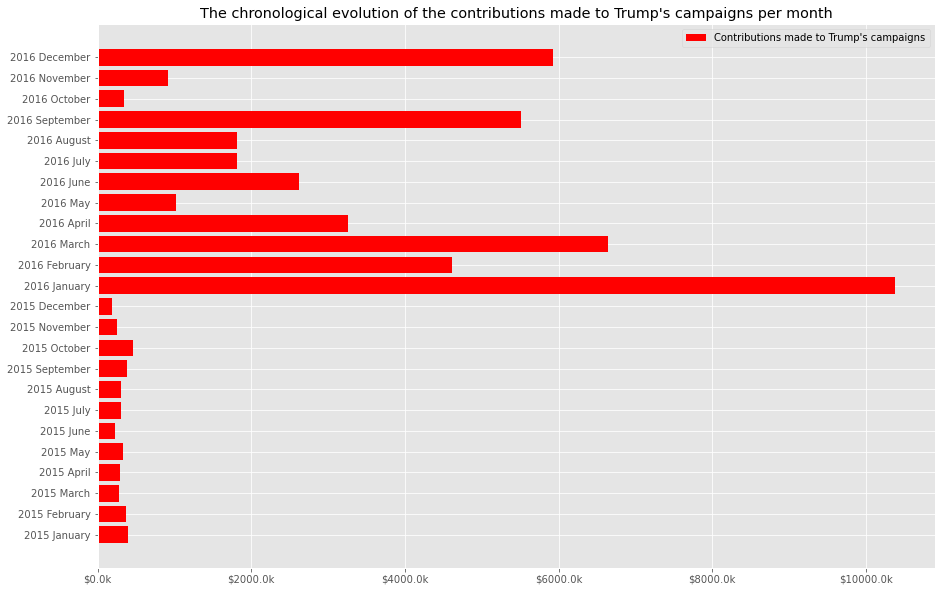

In [73]:
bin_labels_indiv = pd.cut(trump_to_camp['TRANSACTION_DT'], bins_dt)
grouped_indiv = trump_to_camp.groupby(bin_labels_indiv)
trump_bucket_sums_indiv = grouped_indiv['TRANSACTION_AMT'].sum().reset_index()
plot([trump_bucket_sums_indiv.TRANSACTION_AMT], labels, colors=['red'],\
     leg_labels=['Contributions made to Trump\'s campaigns'],title='The chronological evolution of the contributions made to Trump\'s campaigns per month')

* One plot:

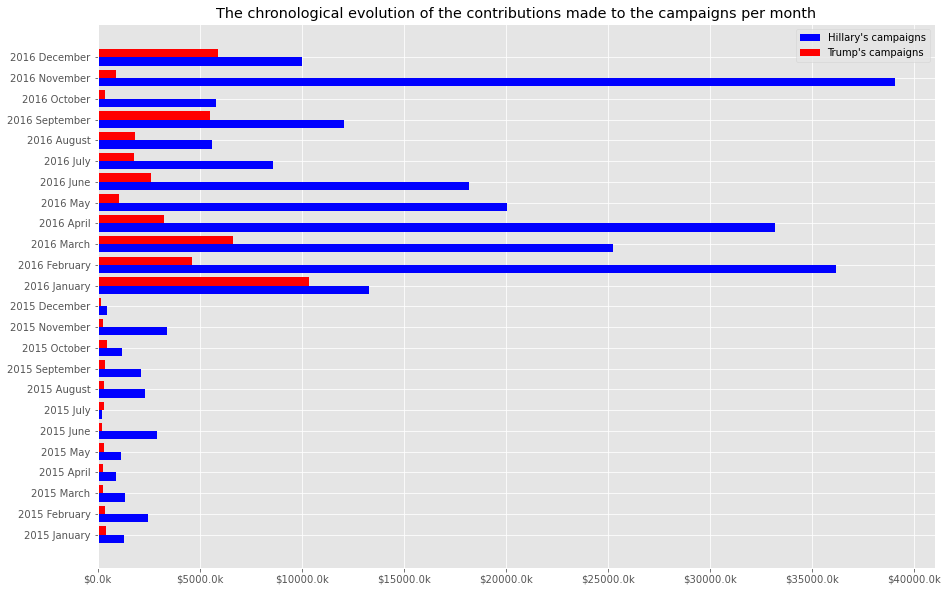

In [74]:
plot([hillary_bucket_sums_indiv.TRANSACTION_AMT, trump_bucket_sums_indiv.TRANSACTION_AMT], labels, colors=['blue','red'],\
     leg_labels=['Hillary\'s campaigns','Trump\'s campaigns'],title='The chronological evolution of the contributions made to the campaigns per month')

#### Operating expenditures
* We will read operating expenditures from https://www.fec.gov/files/bulk-downloads/2016/oppexp16.zip
* We'll also need to read the header file separately, available from https://www.fec.gov/files/bulk-downloads/data_dictionaries/oppexp_header_file.csv

In [75]:
oppexp_df = pd.read_csv(
    'https://www.fec.gov/files/bulk-downloads/data_dictionaries/oppexp_header_file.csv')

oppexp_header = oppexp_df.columns.tolist()
oppexp_header

['CMTE_ID',
 'AMNDT_IND',
 'RPT_YR',
 'RPT_TP',
 'IMAGE_NUM',
 'LINE_NUM',
 'FORM_TP_CD',
 'SCHED_TP_CD',
 'NAME',
 'CITY',
 'STATE',
 'ZIP_CODE',
 'TRANSACTION_DT',
 'TRANSACTION_AMT',
 'TRANSACTION_PGI',
 'PURPOSE',
 'CATEGORY',
 'CATEGORY_DESC',
 'MEMO_CD',
 'MEMO_TEXT',
 'ENTITY_TP',
 'SUB_ID',
 'FILE_NUM',
 'TRAN_ID',
 'BACK_REF_TRAN_ID']

In [76]:
data_types = { header: np.str for header in oppexp_header }
data_types['TRANSACTION_AMT'] = np.float
data_types

{'CMTE_ID': str,
 'AMNDT_IND': str,
 'RPT_YR': str,
 'RPT_TP': str,
 'IMAGE_NUM': str,
 'LINE_NUM': str,
 'FORM_TP_CD': str,
 'SCHED_TP_CD': str,
 'NAME': str,
 'CITY': str,
 'STATE': str,
 'ZIP_CODE': str,
 'TRANSACTION_DT': str,
 'TRANSACTION_AMT': float,
 'TRANSACTION_PGI': str,
 'PURPOSE': str,
 'CATEGORY': str,
 'CATEGORY_DESC': str,
 'MEMO_CD': str,
 'MEMO_TEXT': str,
 'ENTITY_TP': str,
 'SUB_ID': str,
 'FILE_NUM': str,
 'TRAN_ID': str,
 'BACK_REF_TRAN_ID': str}

In [77]:
oppexp = pd.read_csv('https://www.fec.gov/files/bulk-downloads/2016/oppexp16.zip', 
                  sep="|", 
                  index_col=False, 
                  names=oppexp_header, 
                  dtype=data_types,
                  usecols=['CMTE_ID','NAME','STATE','TRANSACTION_DT','TRANSACTION_AMT','CATEGORY','CATEGORY_DESC'],
                  encoding='ISO-8859-1')
oppexp.head(5)

,CMTE_ID,NAME,STATE,TRANSACTION_DT,TRANSACTION_AMT,CATEGORY,CATEGORY_DESC
0,C00415182,CHASE CARDMEMBER SERVICE,DE,02/21/2015,3301.24,001,Administrative/Salary/Overhead Expenses
1,C00415182,GOOGLE INC.,CA,01/21/2015,56.42,001,Administrative/Salary/Overhead Expenses
2,C00415182,LINKEDIN CORPORATION,CA,01/21/2015,49.95,001,Administrative/Salary/Overhead Expenses
3,C00415182,NATIONBUILDER,CA,01/21/2015,99.00,001,Administrative/Salary/Overhead Expenses
4,C00415182,"NGP VAN, INC.",DC,01/21/2015,2000.00,001,Administrative/Salary/Overhead Expenses


In [78]:
oppexp.TRANSACTION_DT = pd.to_datetime(oppexp.TRANSACTION_DT, errors='coerce')
oppexp.dtypes

CMTE_ID                    object
NAME                       object
STATE                      object
TRANSACTION_DT     datetime64[ns]
TRANSACTION_AMT           float64
CATEGORY                   object
CATEGORY_DESC              object
dtype: object

* As we can see there are some outliers (wrong dates)
* We want dates in range [2015, 2016]

In [79]:
max_oppexp = oppexp.loc[oppexp['TRANSACTION_DT'].idxmax()]
max_oppexp.TRANSACTION_DT

Timestamp('2116-01-01 00:00:00')

In [80]:
min_oppexp = oppexp.loc[oppexp['TRANSACTION_DT'].idxmin()]
min_oppexp.TRANSACTION_DT

Timestamp('2001-03-24 00:00:00')

In [81]:
oppexp_1516 = oppexp[(oppexp.TRANSACTION_DT>(pd.to_datetime('2014/12'))+pd.offsets.MonthEnd()) & (oppexp.TRANSACTION_DT<=(pd.to_datetime('2016-12'))+pd.offsets.MonthEnd())]

In [82]:
max_oppexp = oppexp_1516.loc[oppexp_1516['TRANSACTION_DT'].idxmax()]
max_oppexp.TRANSACTION_DT

Timestamp('2016-12-31 00:00:00')

In [83]:
min_oppexp = oppexp_1516.loc[oppexp_1516['TRANSACTION_DT'].idxmin()]
min_oppexp.TRANSACTION_DT

Timestamp('2015-01-01 00:00:00')

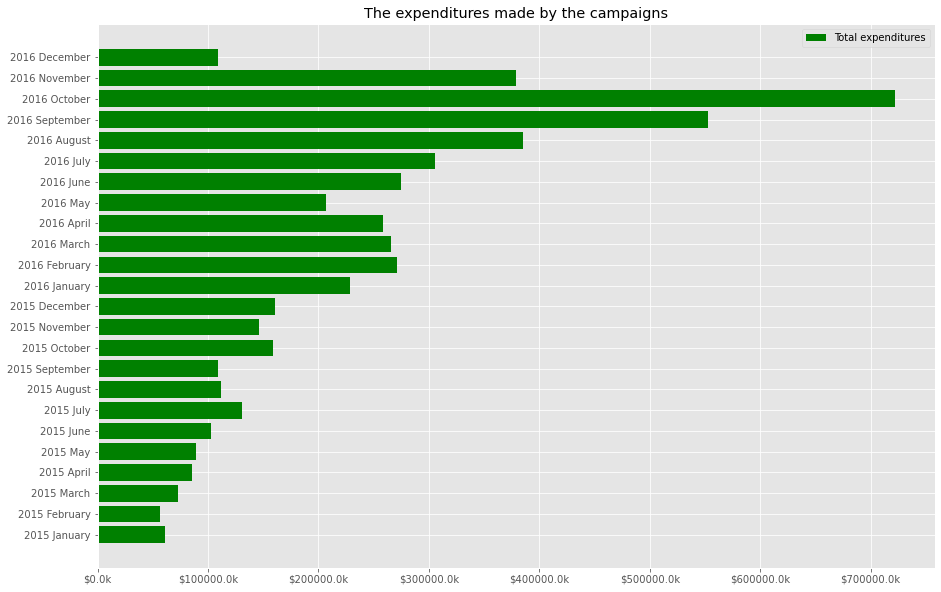

In [84]:
bin_labels_oppexp = pd.cut(oppexp_1516['TRANSACTION_DT'], bins_dt)
grouped_oppexp = oppexp_1516.groupby(bin_labels_oppexp)
bucket_sums_oppexp = grouped_oppexp['TRANSACTION_AMT'].sum().reset_index()
plot([bucket_sums_oppexp.TRANSACTION_AMT], labels,colors=['green'],leg_labels=['Total expenditures'],title='The expenditures made by the campaigns')

* On the other hand, the expenditures made by the campaigns was distributed
* Also, the higher expenditures made by the campaigns in Octomber, one month before the election month

* Now we will focus on the expenditures made by the Hillary's campaigns and then for Trump's ones

In [85]:
h_oppexp_1516 = oppexp_1516[oppexp_1516.CMTE_ID.isin(hillary_to_camp['CMTE_ID'].unique().tolist())]    

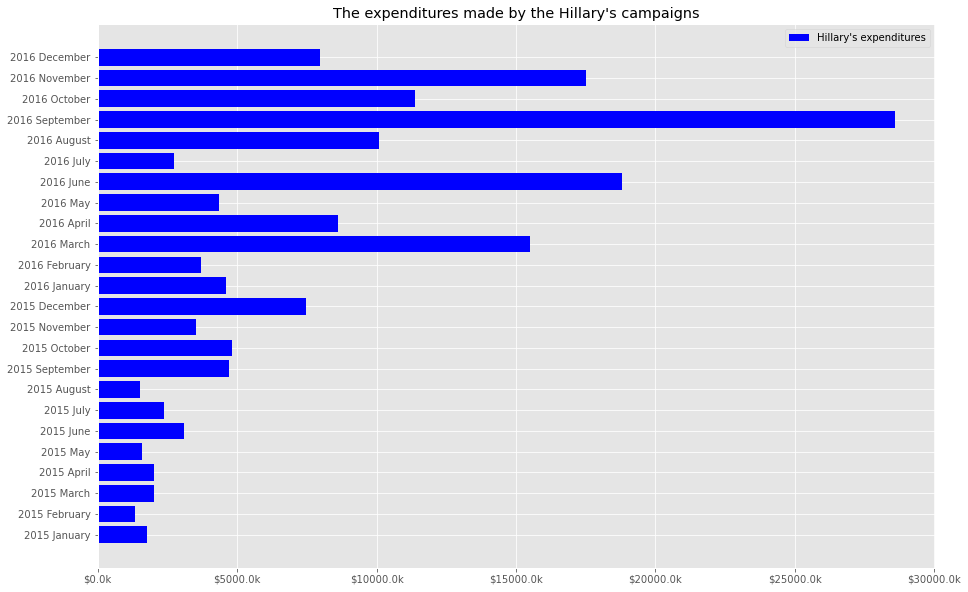

In [86]:
bin_labels_oppexp = pd.cut(h_oppexp_1516['TRANSACTION_DT'], bins_dt)
grouped_oppexp = h_oppexp_1516.groupby(bin_labels_oppexp)
h_bucket_sums_oppexp = grouped_oppexp['TRANSACTION_AMT'].sum().reset_index()
plot([h_bucket_sums_oppexp.TRANSACTION_AMT], labels,colors=['blue'],leg_labels=['Hillary\'s expenditures'],title='The expenditures made by the Hillary\'s campaigns')

In [87]:
t_oppexp_1516 = oppexp_1516[oppexp_1516.CMTE_ID.isin(trump_to_camp['CMTE_ID'].unique().tolist())]   

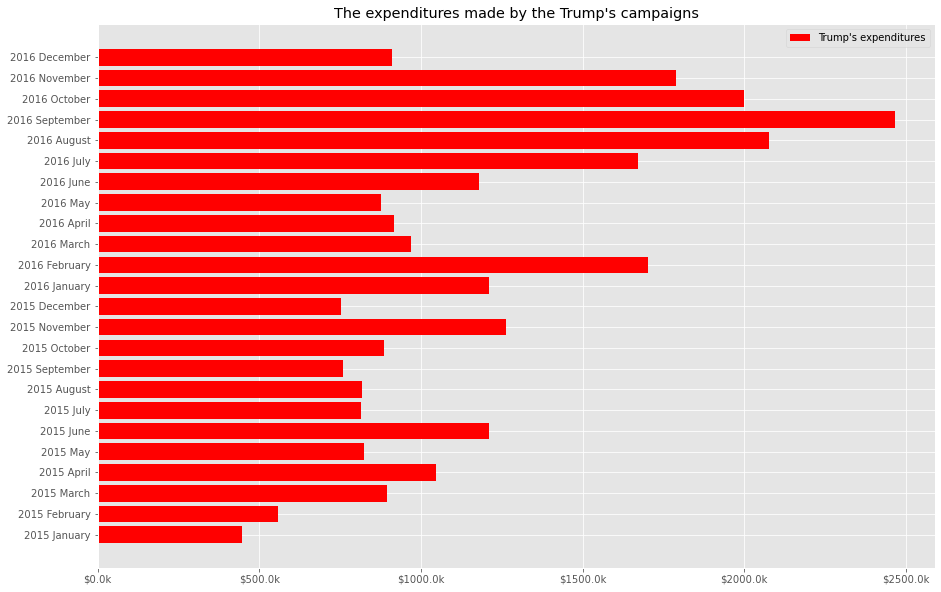

In [88]:
bin_labels_oppexp = pd.cut(t_oppexp_1516['TRANSACTION_DT'], bins_dt)
grouped_oppexp = t_oppexp_1516.groupby(bin_labels_oppexp)
t_bucket_sums_oppexp = grouped_oppexp['TRANSACTION_AMT'].sum().reset_index()
plot([t_bucket_sums_oppexp.TRANSACTION_AMT], labels,colors=['red'],leg_labels=['Trump\'s expenditures'],title='The expenditures made by the Trump\'s campaigns')

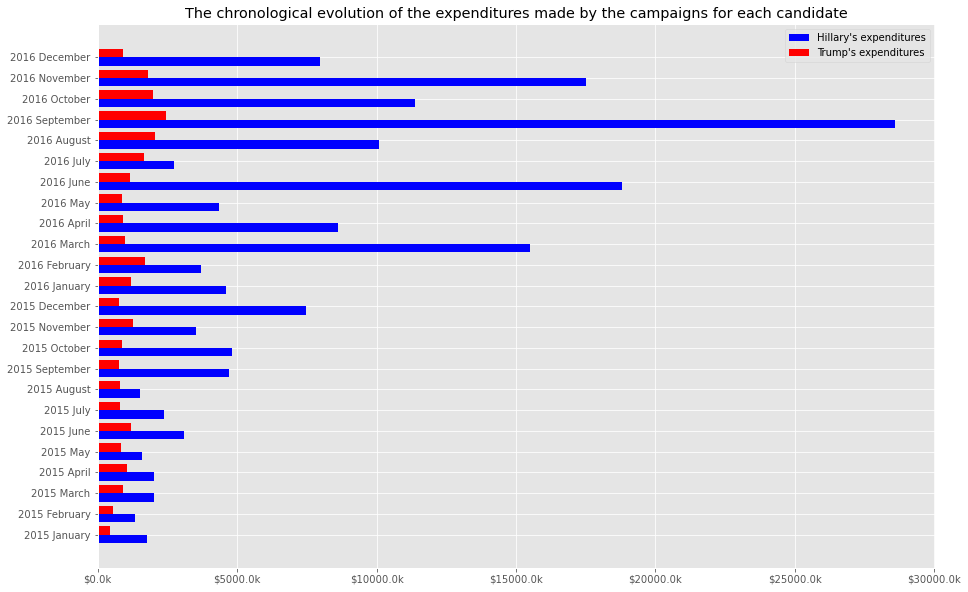

In [89]:
plot([h_bucket_sums_oppexp.TRANSACTION_AMT,t_bucket_sums_oppexp.TRANSACTION_AMT], labels,colors=['blue','red'],\
     leg_labels=['Hillary\'s expenditures','Trump\'s expenditures'],title='The chronological evolution of the expenditures made by the campaigns for each candidate')

* As we can see both contributions made to and the expenditures made by the campaigns for Hillary was more the contributions made to and the expenditures made by the campaigns for Trump
* Hillary had more financial support than Trump

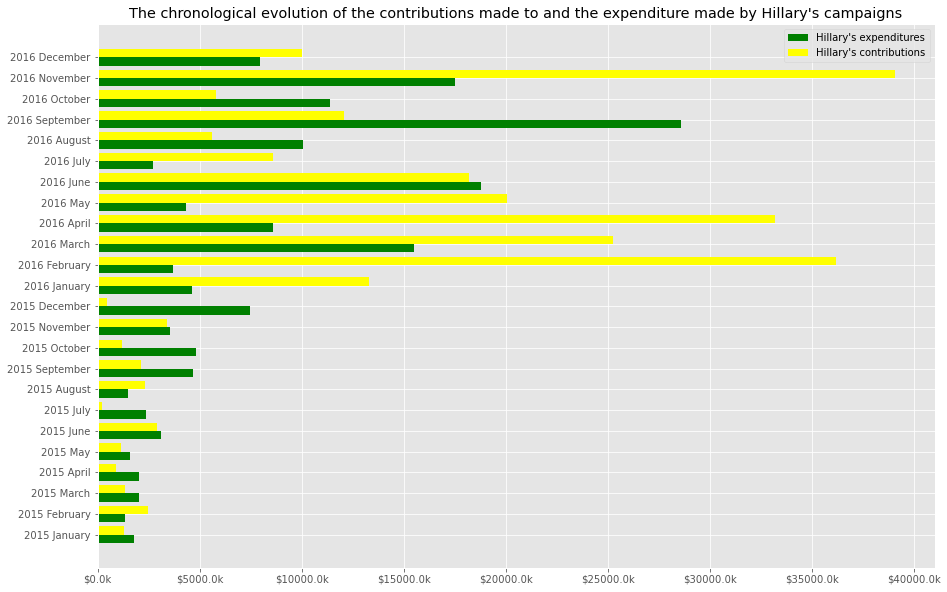

In [90]:
plot([h_bucket_sums_oppexp.TRANSACTION_AMT,hillary_bucket_sums_indiv.TRANSACTION_AMT], labels,colors=['green','yellow'],\
     leg_labels=['Hillary\'s expenditures','Hillary\'s contributions'],title='The chronological evolution of the contributions made to and the expenditure made by Hillary\'s campaigns')

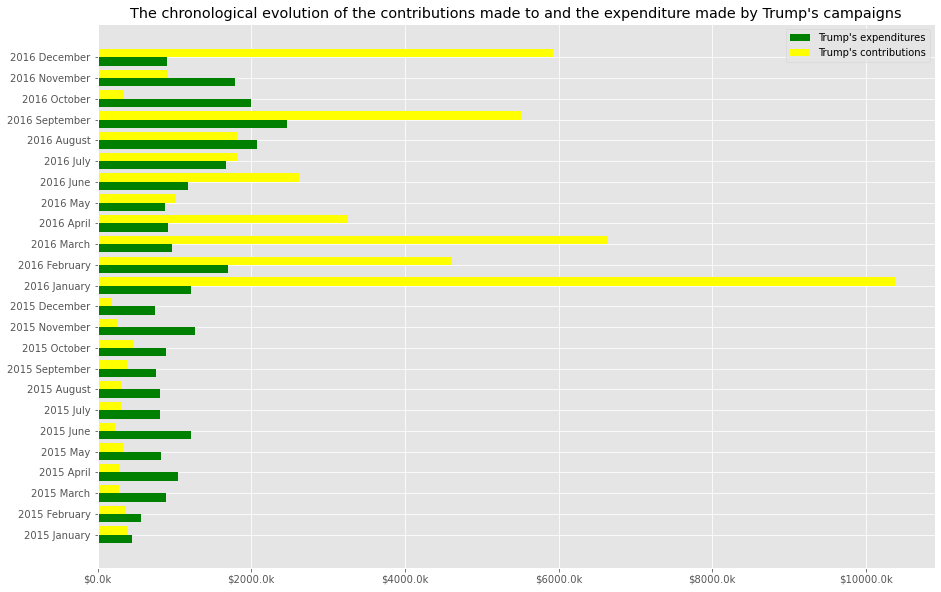

In [91]:
plot([t_bucket_sums_oppexp.TRANSACTION_AMT,trump_bucket_sums_indiv.TRANSACTION_AMT], labels,colors=['green','yellow'],\
     leg_labels=['Trump\'s expenditures','Trump\'s contributions'],title='The chronological evolution of the contributions made to and the expenditure made by Trump\'s campaigns')

4. Identify the biggest recipients of campaign expenditures.

* The top 10 recipients:

In [92]:
oppexp.groupby('NAME').sum()\
    .sort_values(by='TRANSACTION_AMT', ascending=False).head(10).reset_index()

,NAME,TRANSACTION_AMT
0,GMMB,3.230724e+08
1,AMERICAN EXPRESS,1.299160e+08
2,BULLY PULPIT INTERACTIVE LLC,1.235089e+08
3,GILES-PARSCALE,9.154091e+07
4,OLD TOWNE MEDIA INC,8.304847e+07
5,AMERICAN MEDIA & ADVOCACY GROUP,7.473149e+07
6,STATWARE INC. AND OTHER FIRMS,5.000000e+07
7,SMART MEDIA GROUP LLC,4.064065e+07
8,ADP,4.026366e+07
9,COMMUNICATIONS CORPORATION OF AMERICA,3.958748e+07


* GMMB, the first recipient, is a company that organize political campaing spots etc.

* In addition, there is a list of disbursement categories: https://www.fec.gov/campaign-finance-data/disbursement-category-code-descriptions/
* We will investigate the purpose of those expenditures

In [93]:
cat_name = oppexp.groupby(['CATEGORY','CATEGORY_DESC']).sum()\
    .sort_values(by='TRANSACTION_AMT', ascending=False)
cat_name.reset_index().head(10)

,CATEGORY,CATEGORY_DESC,TRANSACTION_AMT
0,001,Administrative/Salary/Overhead Expenses,4.604763e+08
1,004,Advertising Expenses,1.789798e+08
2,003,Solicitation and Fundraising Expenses,1.074945e+08
3,002,Travel Expenses,4.403165e+07
4,005,Polling Expenses,1.848578e+07
5,006,Campaign Materials,1.622941e+07
6,007,Campaign Event Expenses,1.144004e+07
7,011,Political Contributions,2.693207e+06
8,008,Transfers,1.756588e+06
9,012,Donations,1.684124e+06


In [94]:
cat_name = oppexp.groupby(['CATEGORY','CATEGORY_DESC','NAME']).sum()\
    .sort_values(by='TRANSACTION_AMT', ascending=False).reset_index()
cat_name.head(10)

,CATEGORY,CATEGORY_DESC,NAME,TRANSACTION_AMT
0,001,Administrative/Salary/Overhead Expenses,"MENTZER MEDIA SERVICES, INC.",18916976.78
1,001,Administrative/Salary/Overhead Expenses,AMERICAN EXPRESS,9715248.10
2,001,Administrative/Salary/Overhead Expenses,"CARROLL, JOHN S",8724173.99
3,001,Administrative/Salary/Overhead Expenses,AUTOMATIC DATA PROCESSING,7546455.06
4,004,Advertising Expenses,SKDKNICKERBOCKER LLC,6748399.67
5,004,Advertising Expenses,JAMESTOWN ASSOCIATES,6203117.47
6,004,Advertising Expenses,SMART MEDIA GROUP LLC,6132846.43
7,001,Administrative/Salary/Overhead Expenses,RED METRICS,6116230.10
8,001,Administrative/Salary/Overhead Expenses,PAYCHEX,6086155.40
9,004,Advertising Expenses,SCREEN STRATEGIES MEDIA,5471816.95


In [95]:
h_oppexp = oppexp[oppexp.CMTE_ID.isin(hillary_to_camp['CMTE_ID'].unique().tolist())] 
t_oppexp = oppexp[oppexp.CMTE_ID.isin(trump_to_camp['CMTE_ID'].unique().tolist())] 

* The top 10 Hillary's recipients:

In [96]:
h_oppexp.groupby('NAME').sum()\
    .sort_values(by='TRANSACTION_AMT', ascending=False).head(10).reset_index()

,NAME,TRANSACTION_AMT
0,SEIU GENERAL FUND,7886324.02
1,BULLY PULPIT INTERACTIVE LLC,6838041.69
2,NEXTGEN CLIMATE ACTION,6457817.07
3,PRECISION NETWORK LLC,5783530.99
4,AFL-CIO COPE TREASURY,4299822.57
5,PAYROLL DATA PROCESSING,4205720.12
6,PROJECT NEW AMERICA,3284702.99
7,FOR OUR FUTURE ACTION FUND,3050817.27
8,AFT SOLIDARITY 527,2880628.31
9,"GLOBAL STRATEGY GROUP, LLC",2631597.53


* The top 10 Trump's recipients:

In [97]:
t_oppexp.groupby('NAME').sum()\
    .sort_values(by='TRANSACTION_AMT', ascending=False).head(10).reset_index()

,NAME,TRANSACTION_AMT
0,ADP,1490546.56
1,DIRECT SUPPORT SERVICES INC,992564.17
2,NEW REPUBLICAN LLC,986984.06
3,RST MARKETING,671891.46
4,DIRECT ANSWER,604256.17
5,SAVANNA COMMUNICATIONS LLC,585696.00
6,"CARTSOFT, LLC",525521.74
7,"FACEBOOK, INC.",459835.08
8,TEA PARTY PATRIOTS,390476.55
9,ANTIETAM COMMUNICATIONS,366000.00


5. Examine the geographical distribution, at the state level, of campaign expenditures. For each state, calculate the expenditures per voter. This will require that you find a source with the number of registered voters per state. Examine the situation for swing states.

* We will find Swing States from Wikipedia (https://en.wikipedia.org/wiki/Swing_state#Determining_swing_states)

In [98]:
import requests
from bs4 import BeautifulSoup

r = requests.get("https://en.wikipedia.org/wiki/Swing_state#Determining_swing_states")

html = r.content
soup = BeautifulSoup(html, 'html.parser')

In [99]:
tables = soup.find_all('table')

data = []
table_body = tables[0].find('tbody')
rows = table_body.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])

In [100]:
swing_states = []
for line in data:
    if len(line)>0:
        if(line[0][-1]==']'):
            swing_states.append(line[-0][:-8])
        else:
            swing_states.append(line[0])
swing_states

['Maine',
 'Nevada',
 'Minnesota',
 'New Hampshire',
 'Michigan',
 'Pennsylvania',
 'Wisconsin',
 'Florida',
 'Arizona',
 'North Carolina',
 'Georgia',
 'National']

* We will download the state postal codes from Infoplease (https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes), a free online encyclopedia(all of the information found on the site is gathered from trusted sources)

In [101]:
r2 = requests.get("https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes")

html = r2.content
soup2 = BeautifulSoup(html, 'html.parser')

In [102]:
tables = soup2.find_all('table')

data = []
table_body = tables[0].find('tbody')
rows = table_body.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])

In [103]:
names = []
postal_codes = []
for line in data:
    names.append(line[0])
    postal_codes.append(line[2])
data = {"NAME":names,"STATE":postal_codes}
postal_codes_df = pd.DataFrame(data)

In [104]:
postal_codes_df.NAME.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

* We will include D.C (District of Columbia) 
* Although it is not a state, it is a federal district. (https://en.wikipedia.org/wiki/Washington,_D.C.)

In [105]:
postal_codes_df = postal_codes_df[postal_codes_df.STATE!='DC']

* We will download the registed voters per state from: https://www.eac.gov/research-and-data/datasets-codebooks-and-surveys?fbclid=IwAR0rJM3OCtBk60V-t0KBXKTLuR3UuFzoMDNj6I4jLiyIBIZm06qiw88KrAM
(column's explanation: https://www.eac.gov/sites/default/files/eac_assets/1/6/EAVS_Codebook_2016.pdf?fbclid=IwAR3izslx8_FA-Dw8k2bSrMfpCcSDvES1q3tXrhAbksd0LwRUx_BD_Ksn7iI)

In [106]:
data_types = {}
data_types['State'] = np.str
data_types['A1a'] = np.str
data_types

voters = pd.read_csv('https://www.eac.gov/sites/default/files/Research/EAVS_2016_Final_Data_for_Public_Release_v2.csv.zip', 
                  sep=",",
                  header=0,
                  usecols=['State','A1a'],
                  dtype=data_types,
                  encoding='ISO-8859-1')

In [107]:
voters = voters[(voters.A1a!='-999999: Data Not Available') & (voters.A1a!='-888888: Not Applicable')]

In [108]:
voters["A1a"] = pd.to_numeric(voters["A1a"])

In [109]:
voters_pers_state = voters.groupby('State').sum().reset_index()
voters_pers_state = voters_pers_state.rename(columns={'State': 'STATE','A1a':'VOTERS'})

In [110]:
amt_per_state = oppexp[['STATE','TRANSACTION_AMT']].groupby(['STATE']).sum().reset_index()
amt_per_state = pd.merge(amt_per_state,
               postal_codes_df, 
               on='STATE', 
               how='inner')
final_res = pd.merge(voters_pers_state,
               amt_per_state, 
               on='STATE', 
               how='inner')
final_res.shape

(49, 4)

* We lost information about 1 state, ND(North Dakota)
* Although we don't know the registered voters of ND, we will continue to investigate

In [111]:
set(postal_codes_df.STATE.tolist()) - set(voters_pers_state.STATE.tolist())

{'ND'}

* Converting numbers to range [0,255]

In [112]:
final_res['perc'] = ((final_res.TRANSACTION_AMT/final_res.VOTERS))
max_perc = final_res.perc.max()
min_perc = final_res.perc.min()
print(max_perc)
print(min_perc)

157.78400367694962
3.343034624727429


In [113]:
final_res = final_res.sort_values(by='perc', ascending=False)
final_res

,STATE,VOTERS,TRANSACTION_AMT,NAME,perc
43,VA,5604106,8.842383e+08,Virginia,157.784004
19,MD,3900090,1.974728e+08,Maryland,50.632893
28,NH,988398,4.543498e+07,New Hampshire,45.968307
6,CT,2331684,7.728920e+07,Connecticut,33.147372
44,VT,472289,1.455240e+07,Vermont,30.812494
29,NJ,5751090,1.656847e+08,New Jersey,28.809266
37,RI,754065,1.921275e+07,Rhode Island,25.478902
10,HI,751483,1.802565e+07,Hawaii,23.986770
7,DE,675663,1.619528e+07,Delaware,23.969462
18,MA,4534974,1.043106e+08,Massachusetts,23.001362


In [114]:
final_res['perc_255'] = ((final_res.perc-min_perc)/(max_perc-min_perc))*255
final_res['color'] = final_res.apply(lambda row:'#%02x%02x%02x' % (255-int(row.perc_255),255-int(row.perc_255), 255), axis=1)

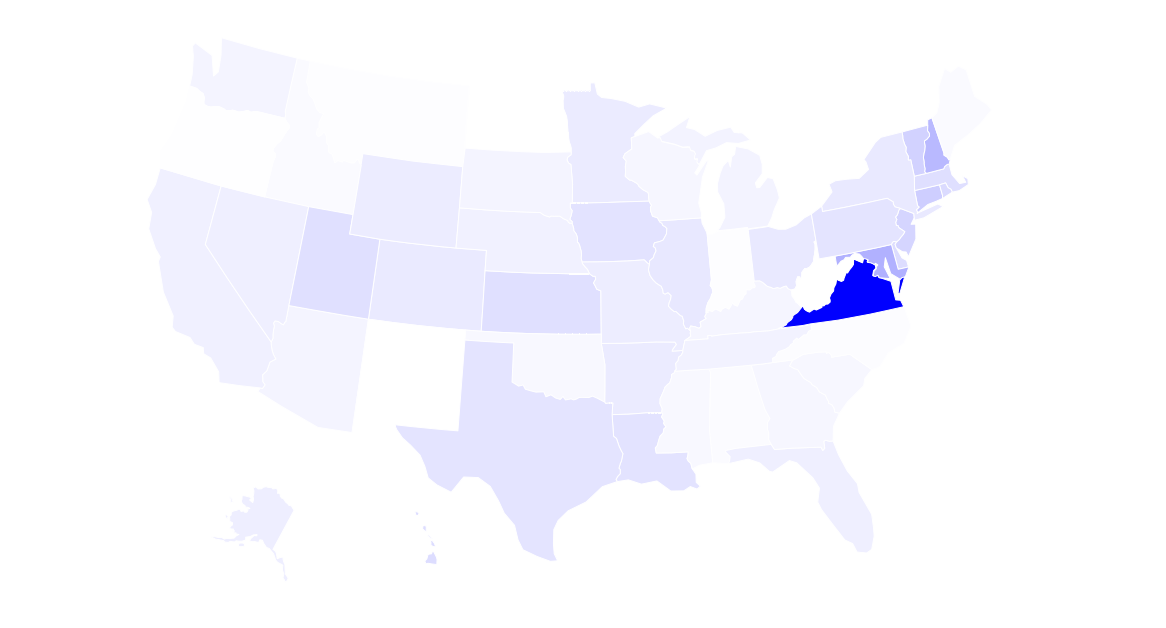

In [115]:
import matplotlib.pyplot as plt
from matplotlib.colorbar import ColorbarBase
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

fig = plt.figure(figsize=(16, 10))

projection=ccrs.LambertConformal()

# to get the effect of having just the states without a map "background"
# turn off the background patch and axes frame
ax = fig.add_axes([0, 0, 1, 1], projection=projection, frameon=False)
ax.patch.set_visible(False)

# Hawaii
axhi = fig.add_axes([0.25, .1, 0.15, 0.15], projection=projection)
axhi.set_extent([-155, -165, 20, 15])
axhi.patch.set_visible(False)
# Alaska
axak = fig.add_axes([0.1, 0.1, 0.2, 0.2], projection=projection)
axak.set_extent([-185, -130, 70, 50])
axak.patch.set_visible(False)

ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m', category='cultural', name=shapename)

cmap = plt.cm.bwr_r

for state in shpreader.Reader(states_shp).records():
    postal = state.attributes['postal']
    facecolor = final_res[final_res['STATE'] == postal]['color'].values
    if postal == 'AK':
        axes = axak
    elif postal == 'HI':
        axes = axhi
    else:
        axes = ax
    axes.add_geometries([state.geometry], 
                        ccrs.PlateCarree(),
                        facecolor=facecolor,
                        linewidth=1,
                        edgecolor='white')

In [116]:
set(final_res.head(20).NAME.tolist()).intersection(set(swing_states))

{'New Hampshire', 'Pennsylvania'}

In [117]:
final_res[final_res.NAME.isin(swing_states)]

,STATE,VOTERS,TRANSACTION_AMT,NAME,perc,perc_255,color
28,NH,988398,4.543498e+07,New Hampshire,45.968307,70.379281,#b9b9ff
36,PA,8722975,1.758335e+08,Pennsylvania,20.157515,27.762662,#e4e4ff
22,MN,3473972,5.522351e+07,Minnesota,15.896362,20.727003,#ebebff
31,NV,1678883,2.268879e+07,Nevada,13.514220,16.793810,#efefff
8,FL,13505571,1.762590e+08,Florida,13.050837,16.028710,#efefff
21,MI,7514055,7.977413e+07,Michigan,10.616655,12.009592,#f3f3ff
3,AZ,4080680,4.232699e+07,Arizona,10.372535,11.606522,#f4f4ff
9,GA,6657621,6.237625e+07,Georgia,9.369150,9.949818,#f6f6ff
46,WI,3768373,3.451004e+07,Wisconsin,9.157810,9.600870,#f6f6ff
20,ME,1065100,7.349950e+06,Maine,6.900714,5.874142,#fafaff


* According to the results, the expenditures per voter  don't influence by the swing states
* We should extract the expenditures per elector, because the number of elector per state plays a significant role in election result
* We will extract this information from Wikipedia (https://en.wikipedia.org/wiki/List_of_2016_United_States_presidential_electors)

In [118]:
names = postal_codes_df.NAME.tolist()

r3 = requests.get("https://en.wikipedia.org/wiki/List_of_2016_United_States_presidential_electors")

html = r3.content
soup3 = BeautifulSoup(html, 'html.parser')
h2s = soup3.find_all('h2')

extracted_names = []
electors = []
for h2 in h2s:
    if(h2.text[:-6] in names):
        extracted_names.append(h2.text[:-6])
        n = h2.find_next('p').text[10:].split()[0][:-1] 
        if(len(n)>3):
            n=n[:-3]
        electors.append(int(n))

In [119]:
data = {"NAME":extracted_names,"ELECTORS":electors}
names_and_electors = pd.DataFrame(data)

In [120]:
final_res = pd.merge(final_res,
               names_and_electors, 
               on='NAME', 
               how='inner')

In [121]:
final_res['perc_per_elector'] = ((final_res.TRANSACTION_AMT/final_res.ELECTORS))

In [122]:
final_res_20_sorted_by_perc = final_res.sort_values(by='perc_per_elector', ascending=False).head(20)

In [123]:
top20_swings = set(final_res_20_sorted_by_perc.NAME.tolist()).intersection(set(swing_states))

* Percentage of swing states:

In [124]:
len(top20_swings) / len(swing_states)

0.3333333333333333

In [125]:
final_res_20_sorted_by_electors = final_res.sort_values(by='ELECTORS', ascending=False).head(20).reset_index()

In [126]:
top20_swings = set(final_res_20_sorted_by_electors.NAME.tolist()).intersection(set(swing_states))

* Percentage of swing states:

In [127]:
len(top20_swings) / len(swing_states)

0.5833333333333334

In [128]:
final_res_20_sorted_by_electors[final_res_20_sorted_by_electors.NAME.isin(swing_states)]

,index,STATE,VOTERS,TRANSACTION_AMT,NAME,perc,perc_255,color,ELECTORS,perc_per_elector
2,26,FL,13505571,1.762590e+08,Florida,13.050837,16.028710,#efefff,29,6.077897e+06
4,14,PA,8722975,1.758335e+08,Pennsylvania,20.157515,27.762662,#e4e4ff,20,8.791675e+06
7,30,MI,7514055,7.977413e+07,Michigan,10.616655,12.009592,#f3f3ff,16,4.985883e+06
8,35,GA,6657621,6.237625e+07,Georgia,9.369150,9.949818,#f6f6ff,16,3.898516e+06
9,43,NC,6924469,3.698924e+07,North Carolina,5.341815,3.300220,#fcfcff,15,2.465949e+06
14,33,AZ,4080680,4.232699e+07,Arizona,10.372535,11.606522,#f4f4ff,11,3.847909e+06
17,20,MN,3473972,5.522351e+07,Minnesota,15.896362,20.727003,#ebebff,10,5.522351e+06


* Ultimately, a more important factor is the number of electors per state

* Now we will do the same for each candidate

* For Hillary:

In [129]:
h_amt_per_state = h_oppexp[['STATE','TRANSACTION_AMT']].groupby(['STATE']).sum().reset_index()
h_amt_per_state = pd.merge(h_amt_per_state,
               postal_codes_df, 
               on='STATE', 
               how='inner')
h_final_res = pd.merge(voters_pers_state,
               h_amt_per_state, 
               on='STATE', 
               how='inner')

In [130]:
h_final_res['perc'] = ((h_final_res.TRANSACTION_AMT/h_final_res.VOTERS))
max_perc = h_final_res.perc.max()
min_perc = h_final_res.perc.min()
print(max_perc)
print(min_perc)
h_final_res = h_final_res.sort_values(by='perc', ascending=False)

2.7996594691612073
0.00017321504828953941


In [131]:
h_final_res.head(20)

,STATE,VOTERS,TRANSACTION_AMT,NAME,perc
28,NH,988398,2767177.82,New Hampshire,2.799659
11,IA,2222380,4469416.35,Iowa,2.011095
5,CO,3840303,6003285.24,Colorado,1.563232
19,MD,3900090,5110629.06,Maryland,1.310387
32,NY,16200892,18226099.77,New York,1.125006
36,PA,8722975,7761331.74,Pennsylvania,0.889757
13,IL,8843038,6264073.76,Illinois,0.708362
33,OH,7861025,5200582.22,Ohio,0.661565
18,MA,4534974,2978532.68,Massachusetts,0.656792
4,CA,24486638,15920317.43,California,0.650163


In [132]:
top20_swings = set(h_final_res.head(20).NAME.tolist()).intersection(set(swing_states))

* Percentage of swing states:

In [133]:
len(top20_swings) / len(swing_states)

0.5

* For Trump:

In [134]:
t_amt_per_state = t_oppexp[['STATE','TRANSACTION_AMT']].groupby(['STATE']).sum().reset_index()
t_amt_per_state = pd.merge(t_amt_per_state,
               postal_codes_df, 
               on='STATE', 
               how='inner')
t_final_res = pd.merge(voters_pers_state,
               t_amt_per_state, 
               on='STATE', 
               how='inner')

In [135]:
t_final_res['perc'] = ((t_final_res.TRANSACTION_AMT/t_final_res.VOTERS))
max_perc = t_final_res.perc.max()
min_perc = t_final_res.perc.min()
print(max_perc)
print(min_perc)
t_final_res = t_final_res.sort_values(by='perc', ascending=False)

1.6247933408111848
0.0007793885720570318


In [136]:
t_final_res.head(20)

,STATE,VOTERS,TRANSACTION_AMT,NAME,perc
41,VA,5604106,9105514.11,Virginia,1.624793
18,MD,3900090,2528864.29,Maryland,0.648412
44,WV,1254768,620266.02,West Virginia,0.494327
35,RI,754065,348595.49,Rhode Island,0.462288
5,CT,2331684,549559.78,Connecticut,0.235692
14,KS,1785834,414523.79,Kansas,0.232118
8,GA,6657621,1521315.40,Georgia,0.228507
10,IA,2222380,412600.38,Iowa,0.185657
26,NH,988398,166383.00,New Hampshire,0.168336
33,OR,2553810,397058.34,Oregon,0.155477


In [137]:
top20_swings = set(t_final_res.head(20).NAME.tolist()).intersection(set(swing_states))

* Percentage of swing states:

In [138]:
len(top20_swings) / len(swing_states)

0.5833333333333334

* After data separation, it is obvious that campaings place emphasis on swing states